# Auditing $f$-DP Curve for the Gaussian Mechanism 

## Description

This notebook demonstrates how to use the auditor API to audit a claimed tradeoff curve for the Gaussian Mechanism.

### Step 1: Import Packages

In [1]:
import numpy as np
import os
import sys
import time
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
log_dir = os.path.join(project_dir, 'log')
fig_dir = os.path.join(project_dir, 'fig')
os.makedirs(fig_dir, exist_ok=True)
os.makedirs(log_dir, exist_ok=True)
logfile_path = os.path.join(log_dir, 'auditing-Gaussian.log')

# Add the src directory to sys.path
sys.path.append(src_dir)

from analysis.tradeoff_Gaussian import Gaussian_curve
from analysis.accuracy_analysis import create_plot

from mech.GaussianDist import *

### Step 2: Instantiate the $f$-DP Auditor for Gaussian Mechanism

In [2]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s %(message)s",
    handlers=[
        logging.FileHandler(logfile_path)
        # logging.StreamHandler()
    ]
)

kwargs = generate_params(claimed_f = Gaussian_curve, num_train_samples=1000000, num_test_samples=1000000)
auditor = GaussianAuditor(kwargs)

### Step 3: Auditing and Report

In [3]:
output = auditor.build()

In [4]:
output["Report"] 

'No Violation'

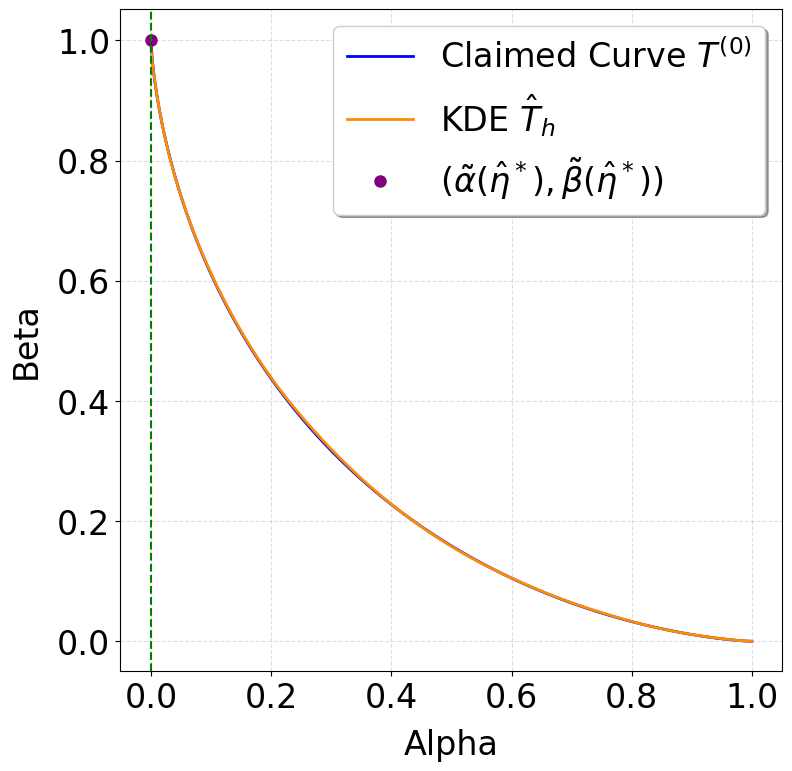

In [5]:
file_name = os.path.join(fig_dir, 'auditing_gaussian_106.png')

create_plot(output["omega"], output["estimated_alpha"], output["estimated_beta"], np.linspace(0,1,500), output["scan_alpha"], output["scan_beta"], output["critical_alpha"], output["critical_beta"], file_name)